<h1 style="color:OrangeRed; font-style:italic; font-family:Georgia;">🚀 Machine Learning Lifecycle</h1>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Problem Definition: Clearly identify the problem to be solved using machine learning.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Data Collection: Gather relevant data from various sources for analysis.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Data Cleaning: Handle missing data, remove duplicates, and correct errors.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Exploratory Data Analysis (EDA): Explore data patterns, trends, and relationships.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Feature Engineering: Create new features or transform existing ones to boost model performance.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Data Preprocessing: Scale, encode, and split data for training and testing.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Selection: Choose suitable algorithms based on the problem type (classification, regression, clustering).</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Training: Train the selected model using preprocessed data.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Hyperparameter Tuning: Adjust model parameters to improve accuracy and reduce errors.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Evaluation: Validate model performance using appropriate metrics (e.g., accuracy, RMSE, F1-score).</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Saving: Save the trained model for future use.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Deployment: Integrate the model into applications or systems for real-time predictions.</h5>

<h5 style="color:Orange; font-style:italic; font-family:'Courier New'; font-weight:bold;">📊 Model Monitoring & Maintenance: Continuously monitor performance and retrain as needed.</h5>


<hr style="border-top: 3px solid blue;">

<h1 style="font-family:'Poppins', sans-serif; color:rgb(3, 105, 206);  text-align: center;">Importing the Required Libraries</h1>

In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pymongo 



import os 
from dotenv import load_dotenv

<h2 style="color:Lime;font-style:italic; font-family:Georgia">About Features:</h2>

<hr style="border-top: 3px solid blue;">

<h1 style="font-family:'Poppins', sans-serif; color:rgb(3, 105, 206);  text-align: center;">Reading the Dataset from Database</h1>

In [20]:
# Our MongoDB Atlas Connection url where clustername is Shipment

Connection_url = os.getenv("MONGO_URL")
# Connect to MongoDB Atlas
client = pymongo.MongoClient(Connection_url)


# Select the database and collection
db = client["new_DB"]  # Replace with our database name
collection = db["new_Collection"]  # Replace with our collection name

# Query data
data = collection.find()

# Convert data to DataFrame
data = pd.DataFrame(list(data))

<hr style="border-top: 3px solid blue;">

In [21]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

In [22]:
data.head()

,_id,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,67c9d07bcb4dbed121bcd9f6,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied
1,67c9d07bcb4dbed121bcda0d,33,Female,33,First-time,Business,Business,173,22,28.0,2,2,5,2,5,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
2,67c9d07bcb4dbed121bcda2e,66,Male,36,Returning,Business,Business,173,12,8.0,5,5,2,3,5,3,3,3,3,4,3,1,3,1,Neutral or Dissatisfied
3,67c9d07bcb4dbed121bcda3a,78,Male,58,Returning,Personal,Economy,173,0,4.0,4,4,1,4,3,4,2,3,2,2,5,4,2,4,Satisfied
4,67c9d07bcb4dbed121bcda42,86,Female,27,Returning,Personal,Economy,212,0,13.0,0,3,5,3,4,3,1,4,1,1,5,3,1,5,Neutral or Dissatisfied


In [23]:
data.drop(columns="_id",inplace=True)

<h1 style="font-family:'Poppins', sans-serif; color:rgb(3, 105, 206);  text-align: center;">Data Exploration</h1>

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Overview of Top and Bottom Rows of the Dataset</h2>


In [24]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,10,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied
1,33,Female,33,First-time,Business,Business,173,22,28.0,2,2,5,2,5,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
2,66,Male,36,Returning,Business,Business,173,12,8.0,5,5,2,3,5,3,3,3,3,4,3,1,3,1,Neutral or Dissatisfied
3,78,Male,58,Returning,Personal,Economy,173,0,4.0,4,4,1,4,3,4,2,3,2,2,5,4,2,4,Satisfied
4,86,Female,27,Returning,Personal,Economy,212,0,13.0,0,3,5,3,4,3,1,4,1,1,5,3,1,5,Neutral or Dissatisfied


In [ ]:
data.tail() 

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129791,Female,66,Returning,Personal,Economy,308,0,0.0,5,3,2,5,4,5,5,3,3,1,5,3,5,5,Neutral or Dissatisfied
129876,129833,Female,37,Returning,Personal,Economy,337,0,0.0,4,2,4,2,4,3,3,3,3,3,5,1,3,4,Neutral or Dissatisfied
129877,129840,Male,56,Returning,Personal,Economy,337,0,0.0,3,2,3,2,2,5,2,4,2,2,3,2,2,5,Neutral or Dissatisfied
129878,129866,Male,64,Returning,Business,Economy Plus,337,27,18.0,3,3,2,2,3,1,2,2,2,2,3,2,2,3,Neutral or Dissatisfied
129879,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [89]:
data.sample(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
78996,Male,51,Returning,Business,Business,1989,0,31.0,1,1,3,4,1,4,5,4,3,3,4,1,4,4,Satisfied
48580,Male,27,First-time,Business,Economy,844,0,0.0,1,1,4,1,2,3,2,4,2,2,3,1,2,4,Neutral or Dissatisfied
85543,Female,37,First-time,Business,Business,1267,0,0.0,0,0,3,0,5,3,4,5,4,4,4,5,4,5,Satisfied
106880,Female,26,First-time,Business,Business,333,0,0.0,2,3,4,3,4,3,5,3,5,5,4,4,5,4,Satisfied
88560,Female,30,Returning,Personal,Economy,404,0,11.0,2,2,3,2,3,1,4,5,4,4,3,2,4,3,Neutral or Dissatisfied


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Checking for Columns/Features Present</h2>


In [26]:
data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Random Sample of the Data</h2>

In [28]:
data.sample(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
126266,126044,Female,31,Returning,Business,Business,3234,0,0.0,1,5,3,5,1,4,5,2,5,5,4,1,5,5,Satisfied
99056,99338,Female,21,Returning,Business,Business,1771,10,11.0,3,2,5,2,3,5,2,2,2,2,5,3,2,5,Satisfied
107035,107199,Female,30,Returning,Personal,Economy,402,0,0.0,4,3,5,3,5,5,5,5,5,5,5,3,5,5,Neutral or Dissatisfied
90728,90684,Male,60,Returning,Business,Business,646,0,0.0,5,2,4,5,2,5,5,5,4,2,5,2,5,5,Satisfied
70479,70488,Male,39,Returning,Business,Business,2647,0,5.0,1,1,4,4,1,5,5,5,5,3,5,1,5,5,Satisfied


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Checking DataType and  Information of the Dataset</h2>

data.dtypes

In [29]:
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Checking for Null Values?</h2>

In [30]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Checking for Duplicate Values?</h2>

In [31]:

data.duplicated().sum()


np.int64(0)

In [32]:
data[data.duplicated()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨Checking for Number of Unique Values for each Column</h2>

In [33]:
data.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color: rgb(179, 14, 143);">✨ Identifying Columns with Fewer than 30 Unique Values</h2>


In [34]:
data.nunique()[data.nunique() < 30].index.tolist()

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color: rgb(179, 14, 143);">✨Checking for value_counts()</h2>


In [58]:
data.groupby(['Gender','Class'])["Satisfaction"].value_counts().unstack()

Satisfaction         Neutral or Dissatisfied  Satisfied
Gender Class                                           
Female Business                         9663      21600
       Economy                         24171       5499
       Economy Plus                     3796       1170
Male   Business                         9331      21566
       Economy                         23195       5444
       Economy Plus                     3296       1149

<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color:rgb(179, 14, 143);">✨ Removing Unnecessary Features to Enhance Dataset Quality</h2>


In [50]:
data.drop(columns=["ID"],inplace=True)

In [52]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Female,38,Returning,Business,Business,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied
1,Female,33,First-time,Business,Business,173,22,28.0,2,2,5,2,5,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
2,Male,36,Returning,Business,Business,173,12,8.0,5,5,2,3,5,3,3,3,3,4,3,1,3,1,Neutral or Dissatisfied
3,Male,58,Returning,Personal,Economy,173,0,4.0,4,4,1,4,3,4,2,3,2,2,5,4,2,4,Satisfied
4,Female,27,Returning,Personal,Economy,212,0,13.0,0,3,5,3,4,3,1,4,1,1,5,3,1,5,Neutral or Dissatisfied


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color: rgb(179, 14, 143);">✨ Summary Statistics for Numerical Data</h2>


In [35]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color: rgb(179, 14, 143);">✨ Summary Statistics for Categorical Data</h2>


In [40]:
data.select_dtypes(include=["object"]).describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


<h2 style="font-family: 'Arial', sans-serif; font-size: 1.5em; font-weight: bold; color: rgb(179, 14, 143);">✨ Segregate Data into Numerical, Categorical, and Datetime Columns</h2>


In [49]:
numerical_columns=data.select_dtypes(include=["number"])
categorical_columns=data.select_dtypes(include=["object"])


In [43]:
numerical_columns.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,10,38,2822,13,0.0,2,5,3,5,2,5,4,5,4,2,5,2,5,5
1,33,33,173,22,28.0,2,2,5,2,5,3,2,3,2,2,5,2,2,5
2,66,36,173,12,8.0,5,5,2,3,5,3,3,3,3,4,3,1,3,1
3,78,58,173,0,4.0,4,4,1,4,3,4,2,3,2,2,5,4,2,4
4,86,27,212,0,13.0,0,3,5,3,4,3,1,4,1,1,5,3,1,5


In [44]:
categorical_columns.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Female,Returning,Business,Business,Satisfied
1,Female,First-time,Business,Business,Neutral or Dissatisfied
2,Male,Returning,Business,Business,Neutral or Dissatisfied
3,Male,Returning,Personal,Economy,Satisfied
4,Female,Returning,Personal,Economy,Neutral or Dissatisfied


EDA

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\987001565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Satisfaction", y="Age", palette="coolwarm")


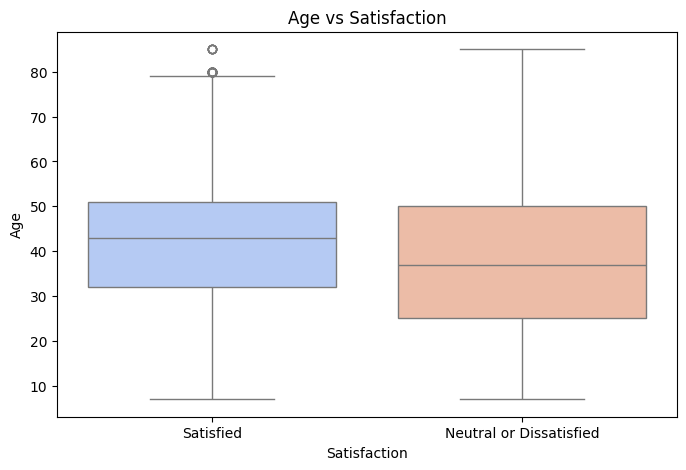

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Satisfaction", y="Age", palette="coolwarm")
plt.title("Age vs Satisfaction")
plt.show()


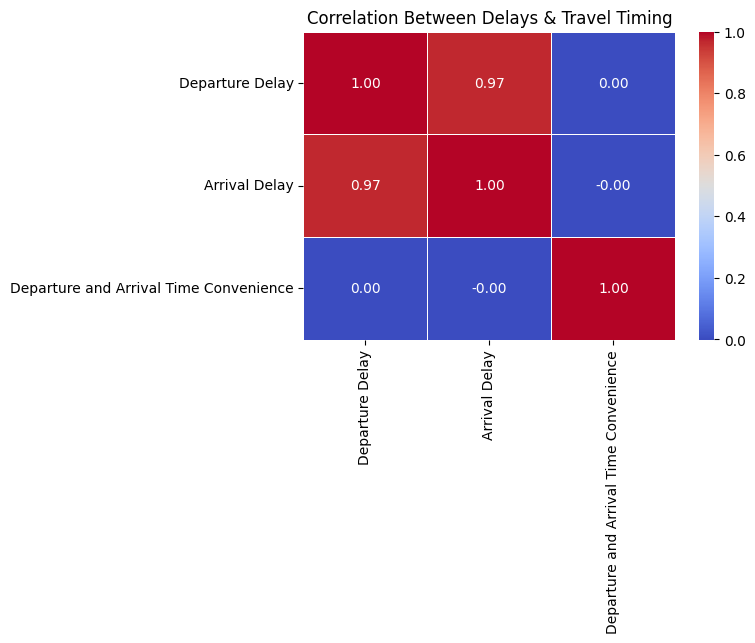

In [82]:
delay_cols = ['Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience']

plt.figure(figsize=(6,4))
sns.heatmap(data[delay_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Delays & Travel Timing")
plt.show()

 

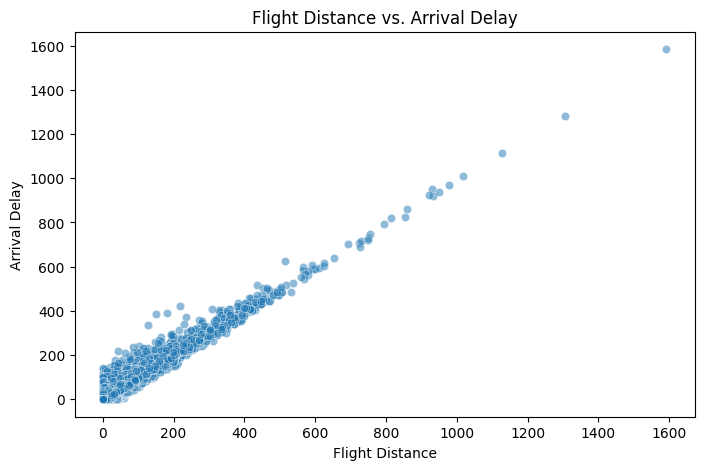

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Departure Delay'], y=data['Arrival Delay'], alpha=0.5)
plt.xlabel("Flight Distance")
plt.ylabel("Arrival Delay")
plt.title("Flight Distance vs. Arrival Delay")
plt.show()
